# PRESENTACIÓN ACÁMICA: Dataset Recorridos Realizados EcoBici 2018
   ### por Francisco Paterson                                                                                                                                                                     
<img src= https://imgsvr.radiocut.site/get/thumb/900/900/cuts_logos/64/dd/64ddc026-2210-47f1-bb91-f62c3ae44f6f.png width= 300>

Según Wikipedia:

>EcoBici, es un sistema de bicicletas compartidas que funciona en la Ciudad de Buenos Aires, cuenta con 400 estaciones y 4000 rodados y en 2018 más de 200.000 usuarios realizaron más de 8 millones de viajes durante el año*. Una característica no usual en este tipo de sistema es que su uso, que requiere un registro previo, es totalmente gratuito tanto para residentes locales como para turistas.

>A partir de 2019, el sistema es operado por la empresa brasileña Tembici conforme a una norma que aprobó la Legislatura porteña meses atrás. Se planea la duplicación de bicicletas y estaciones.Actualmente el sistema está presente en 38 de los 48 barrios de la Ciudad Autónoma de Buenos Aires, funcionando los 365 días del año 24 horas.[(Wikipedia, consultado el 24/10/2019)](https://es.wikipedia.org/wiki/EcoBici_(Buenos_Aires))

El sistema en 2018 ya tenía un funcionamiento horario durante las 24 horas, debido a no requerir la intervención de terceros para su funcionamiento (mediante una app, llamada o tarjeta de la Ciudad). La edad mínima de inscripción es 16 años.

Página de referencia: https://data.buenosaires.gob.ar/dataset/bicicletas-publicas

Fuente primaria: Ministerio de Desarrollo Urbano y Transporte. SS de Movilidad Sustentable y Segura. (Subsecretaria: Paula Bisiau, Ministro: Franco Moccia)

Mantenedor:
Secretaría General y Relaciones Internacionales. Subsecretaría Gestión Estratégica y Calidad Institucional. Dirección General Calidad Institucional y Gobierno Abierto, Jefatura de Gobierno GCBA.

Licencia Atribución 2.5 Argentina (CC BY 2.5 AR)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Acá configuramos el tamaño de las figuras
plt.rcParams['figure.figsize'] = (24,16)
# Seteamos opciones de pandas sobre las columnas y su ancho
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)

In [3]:
df = pd.read_csv("dataset/recorridos-realizados-2018.csv", parse_dates = ["bici_Fecha_hora_retiro","bici_tiempo_uso"])

## 1) ¿Cómo empezar? Primera aproximación al *dataset*
Primero me propuse ver información general sobre el *dataset*, de manera de tener una idea general sobre el mismo (cómo se ve, cantidad de columnas y sus valores, cantidad de filas, tipos de valores, número de NaNs y alguna información sobre su contenido específico).

In [5]:
df.head(10)

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27
5,476733,2018-01-01 00:21:01,0 days 00:36:10.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,31
6,326932,2018-01-01 00:21:30,0 days 00:35:31.000000000,Yatay,121,Billinghurst y Valentin Gomez,143,F,28
7,347609,2018-01-01 00:22:48,0 days 00:31:07.000000000,Pque. Jose Evaristo Uriburu,155,Cerrito,71,M,27
8,392077,2018-01-01 00:23:46,0 days 00:34:28.000000000,Obelisco,7,Azucena Villaflor,79,F,29
9,457895,2018-01-01 00:24:19,0 days 00:17:08.000000000,Obelisco,7,Colegio Nacional Buenos Aires,47,F,26


In [6]:
df.tail()

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
2619963,190597,2018-12-30 19:46:32,0 days 00:07:15.000000000,Plaza Primero de Mayo,75,México,118,M,21
2619964,119885,2018-12-30 19:48:14,0 days 00:09:59.000000000,Virrey Liniers,139,EEUU y Boedo,199,F,22
2619965,652034,2018-12-30 19:48:51,0 days 00:10:32.000000000,Peña,30,Ayacucho,76,F,20
2619966,467438,2018-12-30 19:51:42,0 days 00:09:57.000000000,Sánchez de Bustamante,52,Sánchez de Bustamante,52,M,26
2619967,265951,2018-12-30 19:52:41,0 days 00:10:26.000000000,Parque Lezama,6,Azopardo y Chile,137,M,41


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619968 entries, 0 to 2619967
Data columns (total 9 columns):
bici_id_usuario                 int64
bici_Fecha_hora_retiro          datetime64[ns]
bici_tiempo_uso                 object
bici_nombre_estacion_origen     object
bici_estacion_origen            int64
bici_nombre_estacion_destino    object
bici_estacion_destino           int64
bici_sexo                       object
bici_edad                       int64
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 179.9+ MB


In [8]:
df.index

RangeIndex(start=0, stop=2619968, step=1)

In [9]:
df.size

23579712

El dataset posee 2.619.968 filas, 9 columnas y 23.579.712 elementos.

## *Nota: <font color= red>¿Por qué dice 2 millones 600 mil viajes en el dataset y Wikipedia dice que Paula Bisiau -Subsecretaria de Movilidad Sustentable- declara que fueron más de ocho millones en la afirmación de más arriba?</font> Es importante verificar el discurso público cuando sea posible, y para eso ayuda la ciencia de datos.

## Ambos vínculos a la supuesta afirmación de Bisiau en Wikipedia no existen más, uno está roto y el otro cambió de contenido. La explicación parece radicar en que eran proyecciones y en una mala interpretación de texto, como se ve en otro artículo que habla sobre un informe de la Secretaría de Transporte porteña, en donde dice:

>"Cada día, en la ciudad de Buenos Aires se realizan 8 millones de viajes, el 84% de los cuales se hacen en transporte público. El medio preferido es el colectivo, que acapara al 57,5% de los traslados. "[(Clarín 08/10/2016,consultado el 03/11/2019)](https://www.clarin.com/ciudades/transporte-porteno-mayoria-colectivo-bicicleta_0_B1ARaBS0.html)

## Valores nulos
Hay 43.723 NaN en la columna "bici_tiempo_uso", que es la única que tiene NaNs.

In [10]:
df.isna().sum()

bici_id_usuario                     0
bici_Fecha_hora_retiro              0
bici_tiempo_uso                 43723
bici_nombre_estacion_origen         0
bici_estacion_origen                0
bici_nombre_estacion_destino        0
bici_estacion_destino               0
bici_sexo                           0
bici_edad                           0
dtype: int64

In [7]:
df[df['bici_tiempo_uso'].isnull()]

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad
96,283674,2018-01-01 03:20:51,NaN,Gutierrez,90,Guardia Vieja,110,M,33
100,460284,2018-01-01 03:22:47,NaN,Catamarca,186,Catamarca,186,F,27
103,460268,2018-01-01 03:34:45,NaN,Catamarca,186,Catamarca,186,M,28
115,237740,2018-01-01 04:12:21,NaN,Juan Manuel Blanes,153,Parque Lezama,6,F,34
117,476073,2018-01-01 04:23:25,NaN,Plaza Italia,5,Pasteur,171,M,27
...,...,...,...,...,...,...,...,...,...
2428214,180659,2018-11-22 11:50:22,NaN,Belgrano,57,Alsina,24,M,45
2428279,612049,2018-11-22 12:03:17,NaN,Constitucion I,147,Córdoba,62,M,28
2428335,445854,2018-11-22 12:10:54,NaN,Riobamba,64,Ministerio de Educacion,174,M,28
2428376,43850,2018-11-22 12:19:36,NaN,Sarmiento,40,Córdoba,62,M,26


## Cantidad y nombre de las estaciones de Ecobici

In [11]:
df.bici_nombre_estacion_origen.nunique()

199

In [12]:
df.bici_nombre_estacion_origen.unique()

array(['Uruguay', 'Posadas', 'Hospital Rivadavia', 'Macacha Güemes',
       'Yatay', 'Pque. Jose Evaristo Uriburu', 'Obelisco', 'Plaza Boedo',
       'Hipolito Yrigoyen', 'Ministro Carranza', 'Plaza Italia',
       'Hospital Garrahan', 'Virrey Cevallos',
       'Colegio Nacional Buenos Aires', 'Maipú', 'La Boca',
       'Senillosa y Zuviria', 'Aranguren', 'Humberto 1º',
       'Ministerio de Educacion', 'Avelino Diaz', 'Hospital Francés',
       'Federico Lacroze', 'Ayacucho', 'Virrey Liniers',
       'Hospital Alemán', 'Padilla', '25 de Mayo', 'Azopardo y Chile',
       'Juana Manso', 'Brasil', 'Acuña de Figueroa', 'Azucena Villaflor',
       'Armenia y Gorriti', 'Coronel Díaz', 'Plaza Güemes',
       'Plaza Primero de Mayo', 'Montevideo', 'Riobamba', 'Guatemala',
       'Independencia', 'Guayaquil', 'Parque Patricios',
       'Peron y F. Acuña de Figueroa', 'Plaza Roma', 'Juncal',
       'Talcahuano', 'Agüero', 'Las casas', 'Velasco', 'Cerrito',
       'Suipacha', 'Humahuaca', 'EEUU 

In [13]:
df.bici_id_usuario.nunique()

121015

# 2) Ya con algunas características del DS en la cabeza, comenzaron a surgirme preguntas e hipótesis.


### a. ¿Usaron más el sistema los hombres o las mujeres?
### b. ¿Cómo varía la demanda total durante el año? (estacionalidad) Hipótesis: en épocas de calor se usan menos.
### c.1.¿Cual estación se usó más, y cuál menos? c.2. ¿Qué porcentaje de M o F iniciaron los viajes en esas estaciones?
### d. ¿Qué segmento etario utilizó más el sistema? 
### e. ¿Hay registrados viajes iniciados y no finalizados?


--------------------------------------------------------------------------------------------------------------------------
# a.

In [14]:
df["bici_sexo"].unique()

array(['M', 'F', 'N'], dtype=object)

In [15]:
df["bici_sexo"].nunique()

3

In [16]:
df["bici_sexo"].value_counts()

M    1880740
F     739160
N         68
Name: bici_sexo, dtype: int64

Text(0.5, 1.0, 'Usuarios totales según SEXO, 2018')

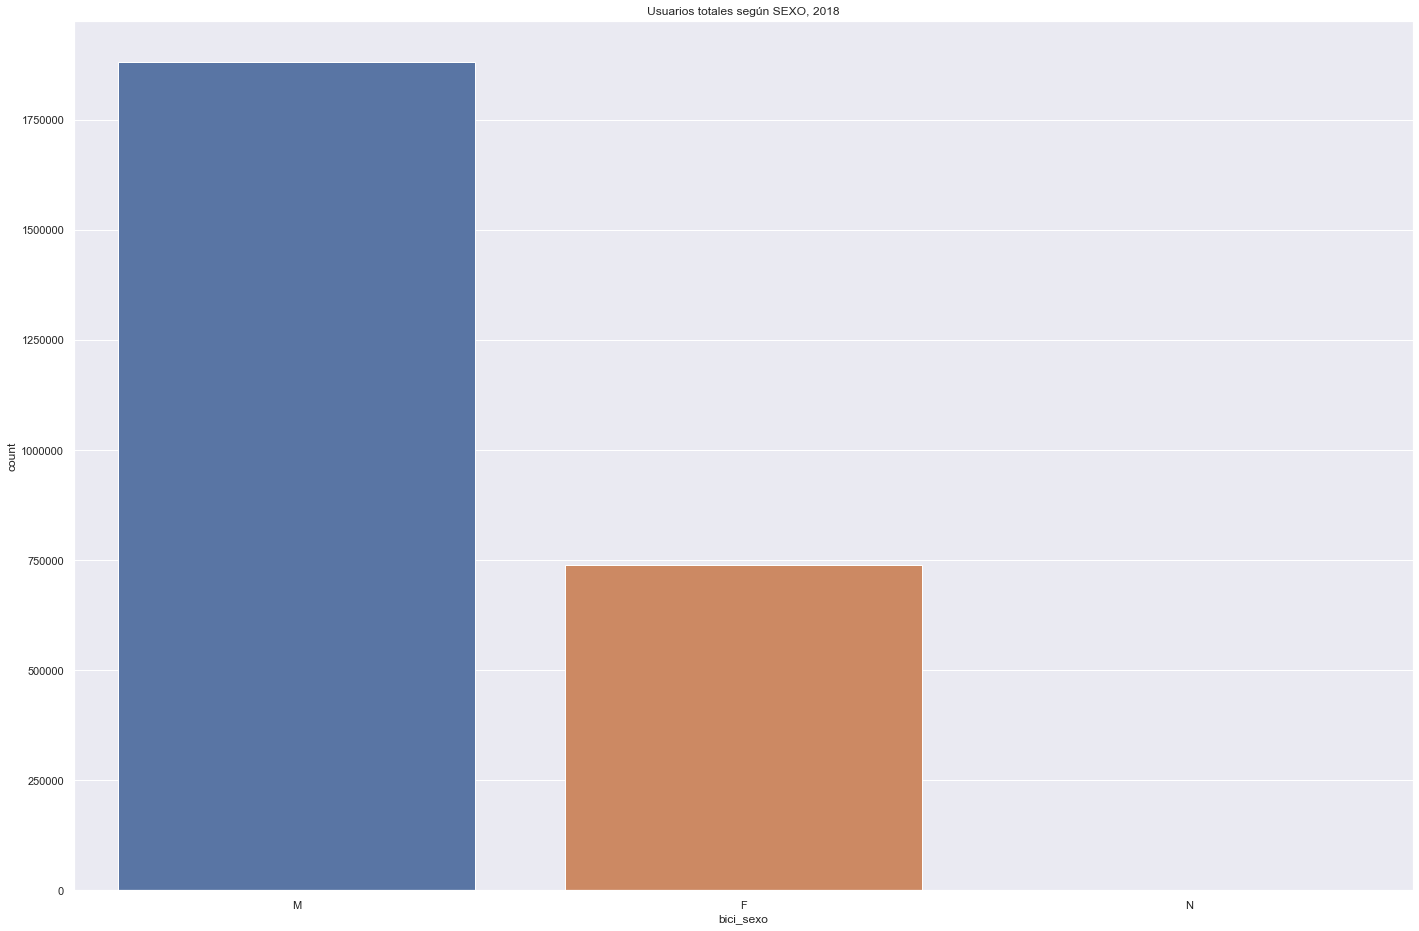

In [19]:
sns.set(style="darkgrid")
sns.countplot("bici_sexo", data=df).set_title("Usuarios totales según SEXO, 2018") 


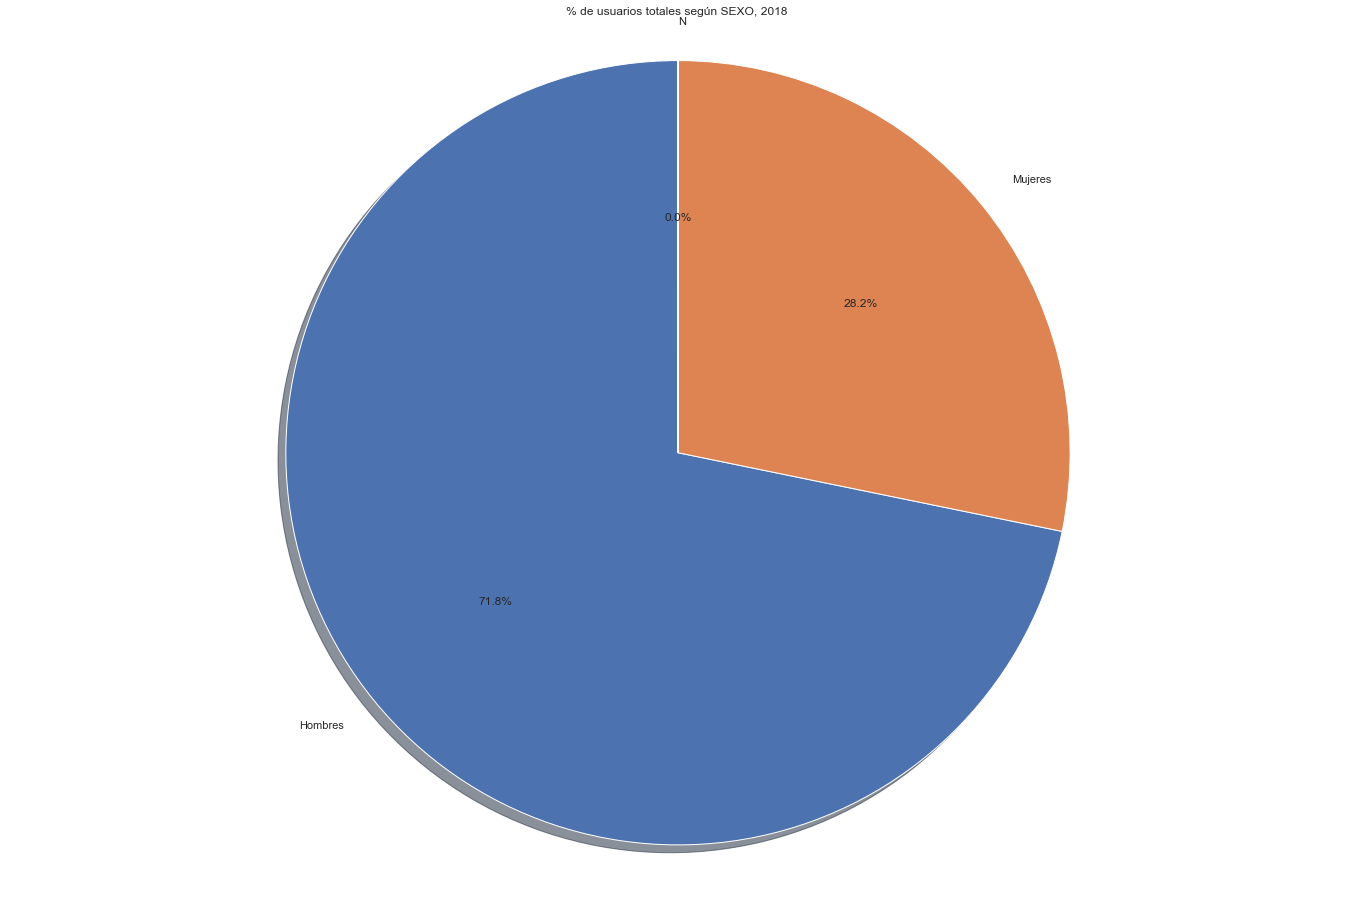

In [20]:
labels = 'Hombres', 'Mujeres', 'N'
sizes = [1880740, 739160, 68]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax1.set_title("% de usuarios totales según SEXO, 2018")

plt.show()

## RTA: Utilizaron el sistema más los hombres que las mujeres, un 71,8% contra un 28,2%.

# b. La mejor forma de ver la estacionalidad para este DS es agruparlo por mes. 

## Retiros según mes

In [4]:
df["mes"] = df.bici_Fecha_hora_retiro.dt.month

Text(0, 0.5, 'Retiros de bicicleta')

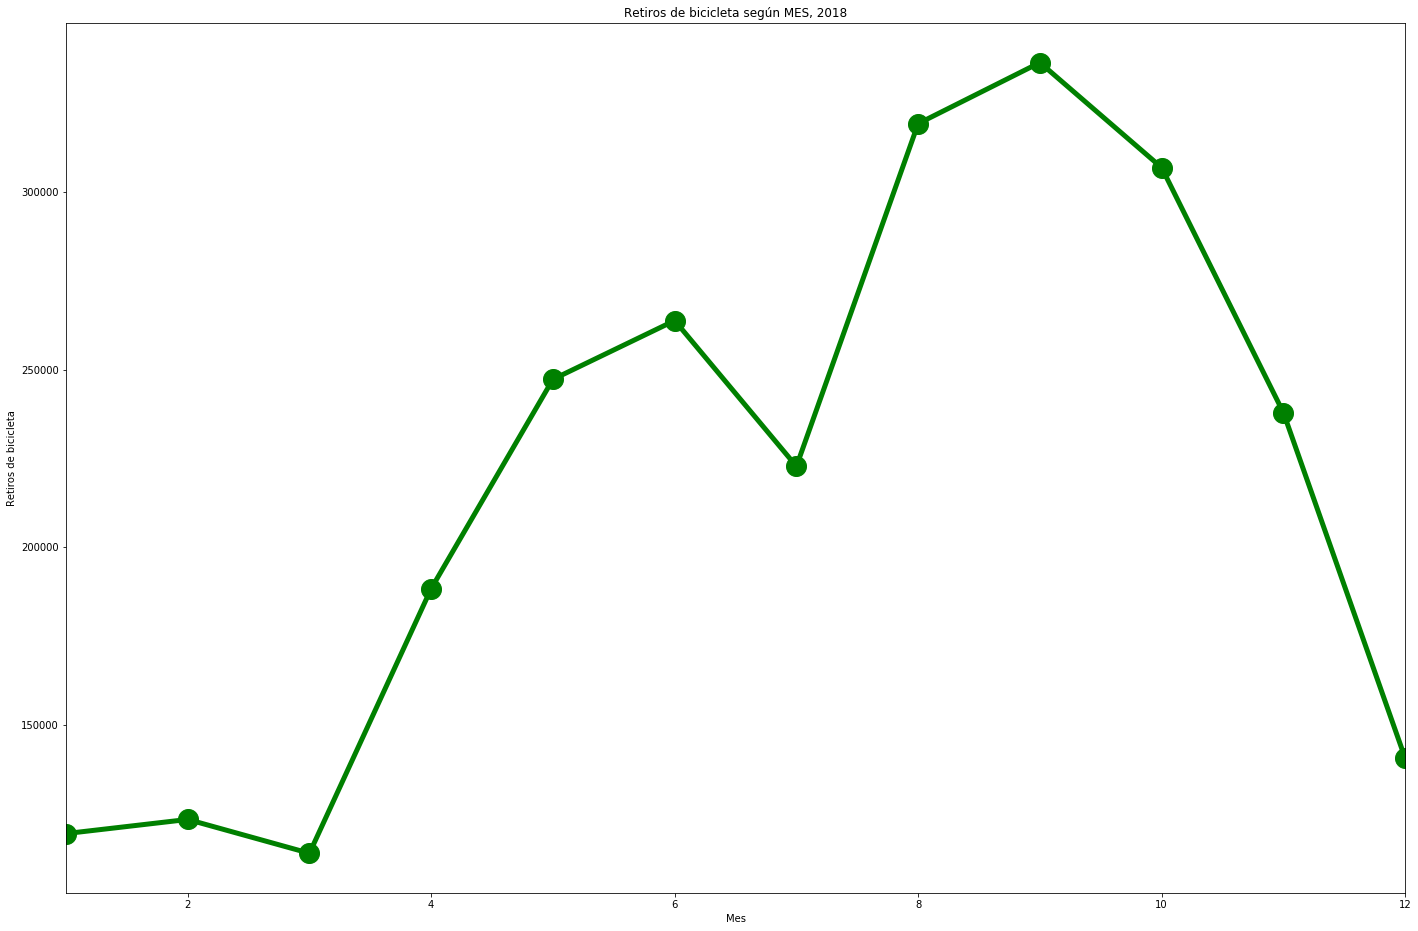

In [5]:
df.mes.value_counts().sort_index().plot(linewidth=5, markersize=20,color='green', marker='o')
plt.title('Retiros de bicicleta según MES, 2018')
plt.xlabel("Mes")
plt.ylabel("Retiros de bicicleta")

In [6]:
df.mes.value_counts().sort_index()

1     119316
2     123300
3     113772
4     188338
5     247297
6     263851
7     222789
8     319342
9     336539
10    306941
11    237910
12    140573
Name: mes, dtype: int64

In [7]:
df.mes.value_counts()

9     336539
8     319342
10    306941
6     263851
5     247297
11    237910
7     222789
4     188338
12    140573
2     123300
1     119316
3     113772
Name: mes, dtype: int64

## RTA: Si definimos "épocas de calor" como el verano, mi hipótesis era correcta, ya que el uso decae grandemente. Si lo vemos como la llegada de la primavera, es incorrecta. Aún los datos dan lugar para la interpretación, si la pregunta fue planteada de forma poco clara.

## Retiros según fecha

In [22]:
df["dia"] = df.bici_Fecha_hora_retiro.dt.day

Text(0, 0.5, 'Retiros de bicicleta')

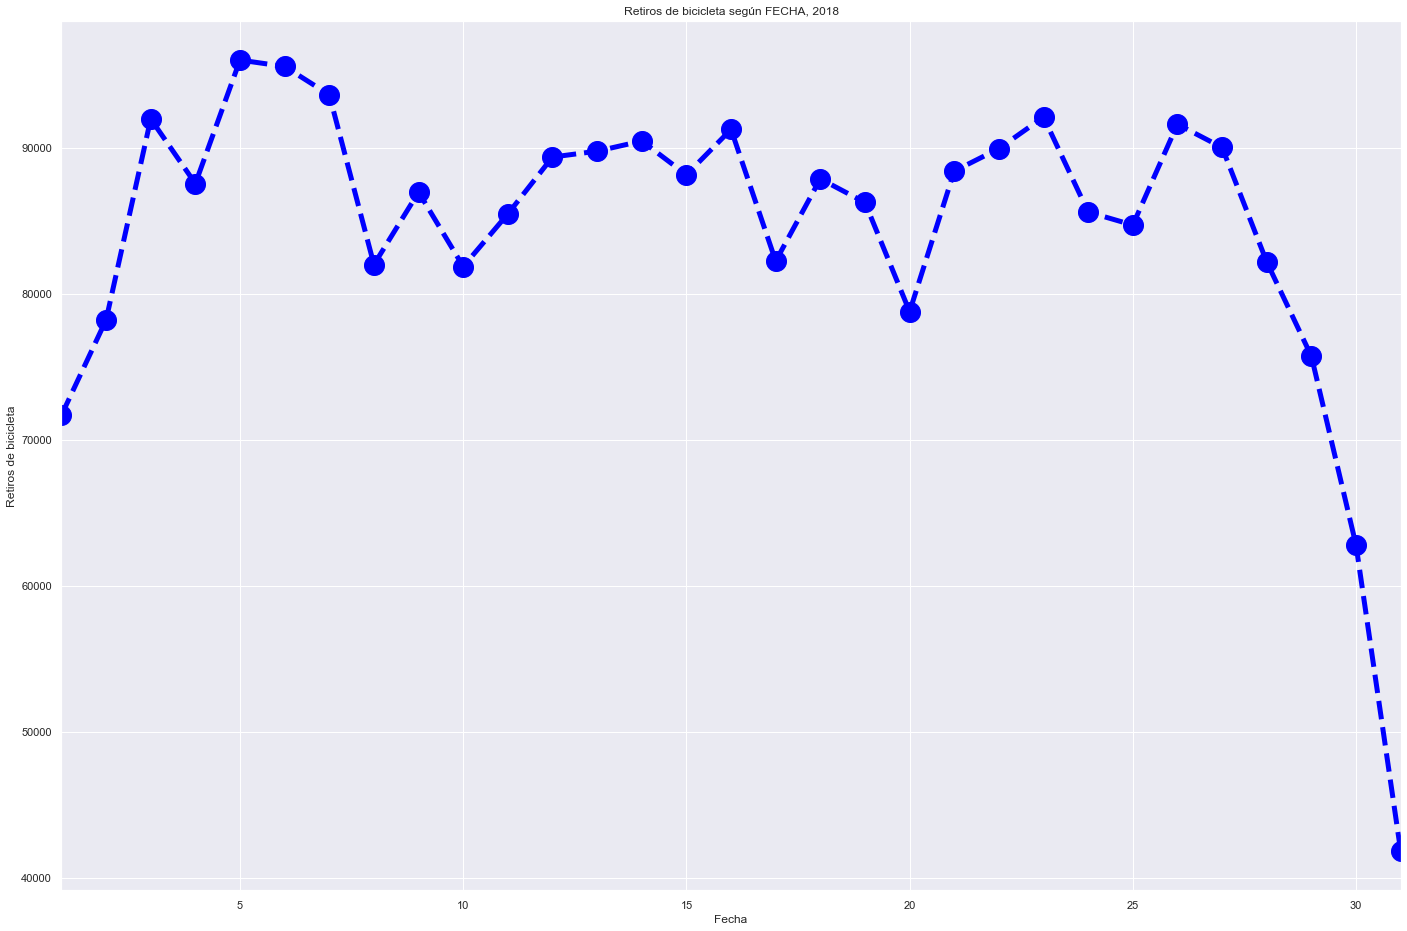

In [23]:
df.dia.value_counts().sort_index().plot(linewidth=5, markersize=20,color='blue', marker='o', linestyle='dashed')
plt.title('Retiros de bicicleta según FECHA, 2018')
plt.xlabel("Fecha")
plt.ylabel("Retiros de bicicleta")

In [24]:
df.dia.value_counts().sort_index()

1     71680
2     78208
3     91976
4     87546
5     96008
6     95570
7     93630
8     81998
9     86961
10    81865
11    85471
12    89365
13    89767
14    90464
15    88151
16    91259
17    82234
18    87869
19    86252
20    78776
21    88401
22    89941
23    92103
24    85599
25    84707
26    91614
27    90019
28    82181
29    75725
30    62788
31    41840
Name: dia, dtype: int64

## Retiros según hora

In [25]:
df["hora"] = df.bici_Fecha_hora_retiro.dt.hour

Text(0, 0.5, 'Retiros de bicicleta')

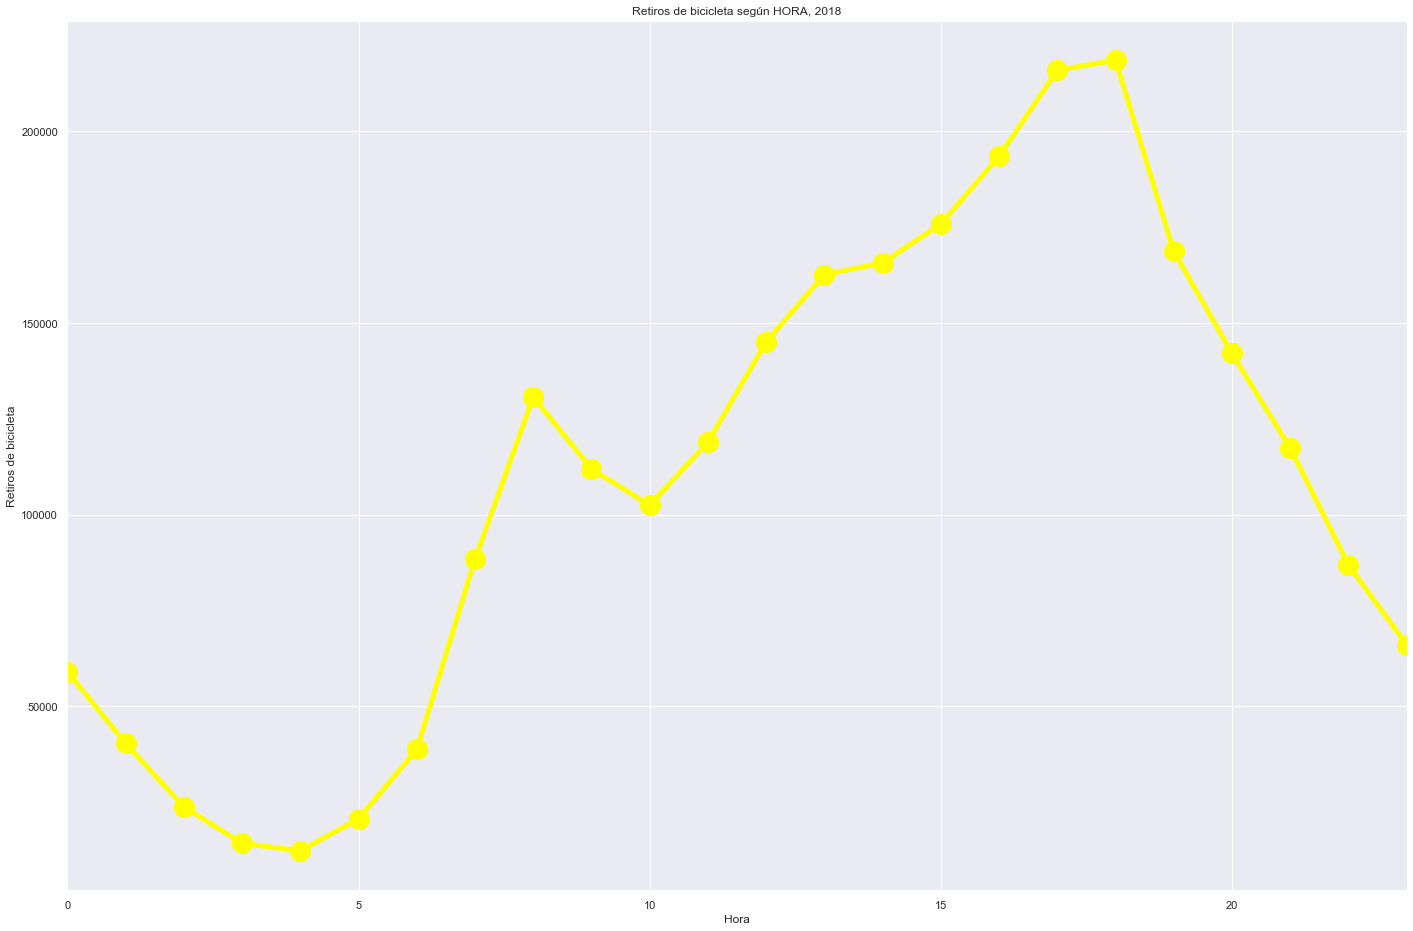

In [26]:
df.hora.value_counts().sort_index().plot(linewidth=5, markersize=20,color='yellow', marker='o')
plt.title('Retiros de bicicleta según HORA, 2018')
plt.xlabel("Hora")
plt.ylabel("Retiros de bicicleta")

In [27]:
df.hora.value_counts()

18    218561
17    215867
16    193462
15    175763
19    168686
14    165673
13    162628
12    145091
20    142070
8     130682
11    118882
21    117397
9     111916
10    102503
7      88422
22     86903
23     66103
0      59065
1      40351
6      38783
2      23807
5      20688
3      14296
4      12369
Name: hora, dtype: int64

## Retiros según día de la semana

In [28]:
df["dia_semana"] = df.bici_Fecha_hora_retiro.dt.weekday_name

Text(0, 0.5, 'Retiros de bicicleta')

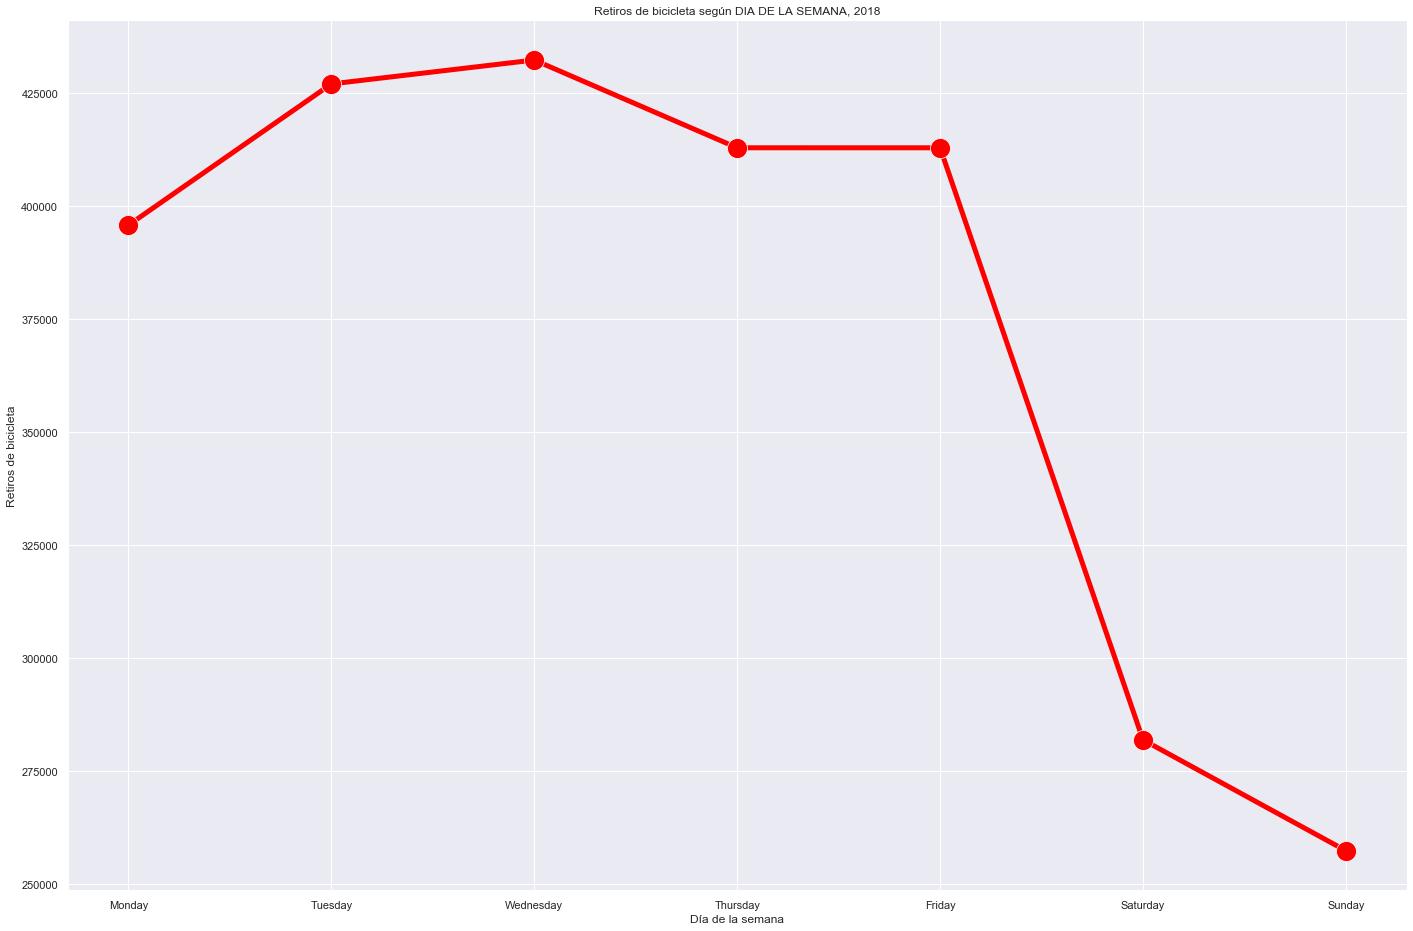

In [29]:
dic_dias = df.dia_semana.value_counts()
orden_dias = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
valores_dias = []
for dia in orden_dias:
   valores_dias.append(dic_dias[dia])
sns.lineplot(orden_dias,valores_dias, sort=False,linewidth=5, markersize=20,color='red', marker='o', linestyle='--')
plt.title('Retiros de bicicleta según DIA DE LA SEMANA, 2018')
plt.xlabel("Día de la semana")
plt.ylabel("Retiros de bicicleta")

In [30]:
df.dia_semana.value_counts().sort_index()

Friday       412845
Monday       395736
Saturday     281919
Sunday       257400
Thursday     412847
Tuesday      426968
Wednesday    432253
Name: dia_semana, dtype: int64

In [31]:
df.dia_semana.value_counts()

Wednesday    432253
Tuesday      426968
Thursday     412847
Friday       412845
Monday       395736
Saturday     281919
Sunday       257400
Name: dia_semana, dtype: int64

# c.1

In [32]:
df.bici_nombre_estacion_origen.value_counts()

Facultad de Medicina       38858
Pacífico                   36834
Parque Las Heras           36500
Plaza Italia               32722
Retiro III                 30765
                           ...  
Santos Dumont y Otero       2419
Plaza Houssay               2213
Hospital Sarda              2090
Plaza Hipolito Bouchard     1287
PALACIO LEZAMA                 5
Name: bici_nombre_estacion_origen, Length: 199, dtype: int64

Text(0, 0.5, 'Retiros')

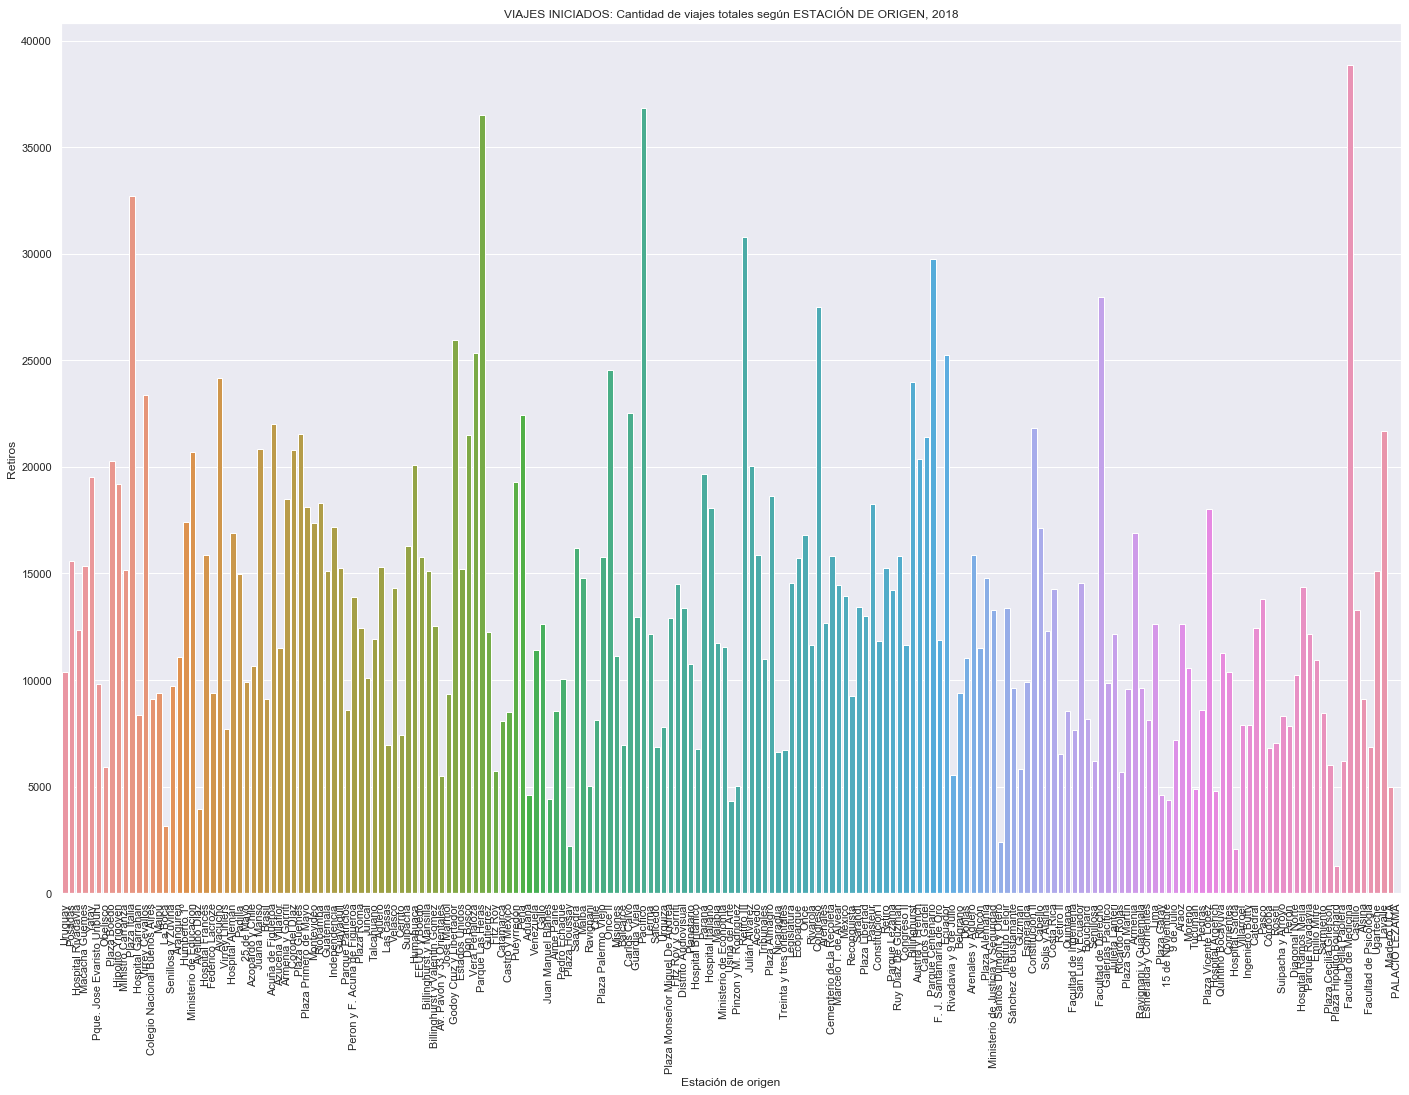

In [33]:
## 3.1
plt.xticks(rotation = 90)
sns.countplot("bici_nombre_estacion_origen", data=df).set_title("VIAJES INICIADOS: Cantidad de viajes totales según ESTACIÓN DE ORIGEN, 2018")
plt.xlabel("Estación de origen")
plt.ylabel("Retiros")

In [34]:
df.bici_nombre_estacion_destino.value_counts()

Facultad de Medicina       39027
Pacífico                   36402
Parque Las Heras           34573
Parque Centenario          29611
Plaza Italia               28842
                           ...  
Santos Dumont y Otero       2239
Plaza Houssay               2229
Hospital Sarda              2152
Plaza Hipolito Bouchard     1246
PALACIO LEZAMA                12
Name: bici_nombre_estacion_destino, Length: 199, dtype: int64

Text(0, 0.5, 'Devoluciones')

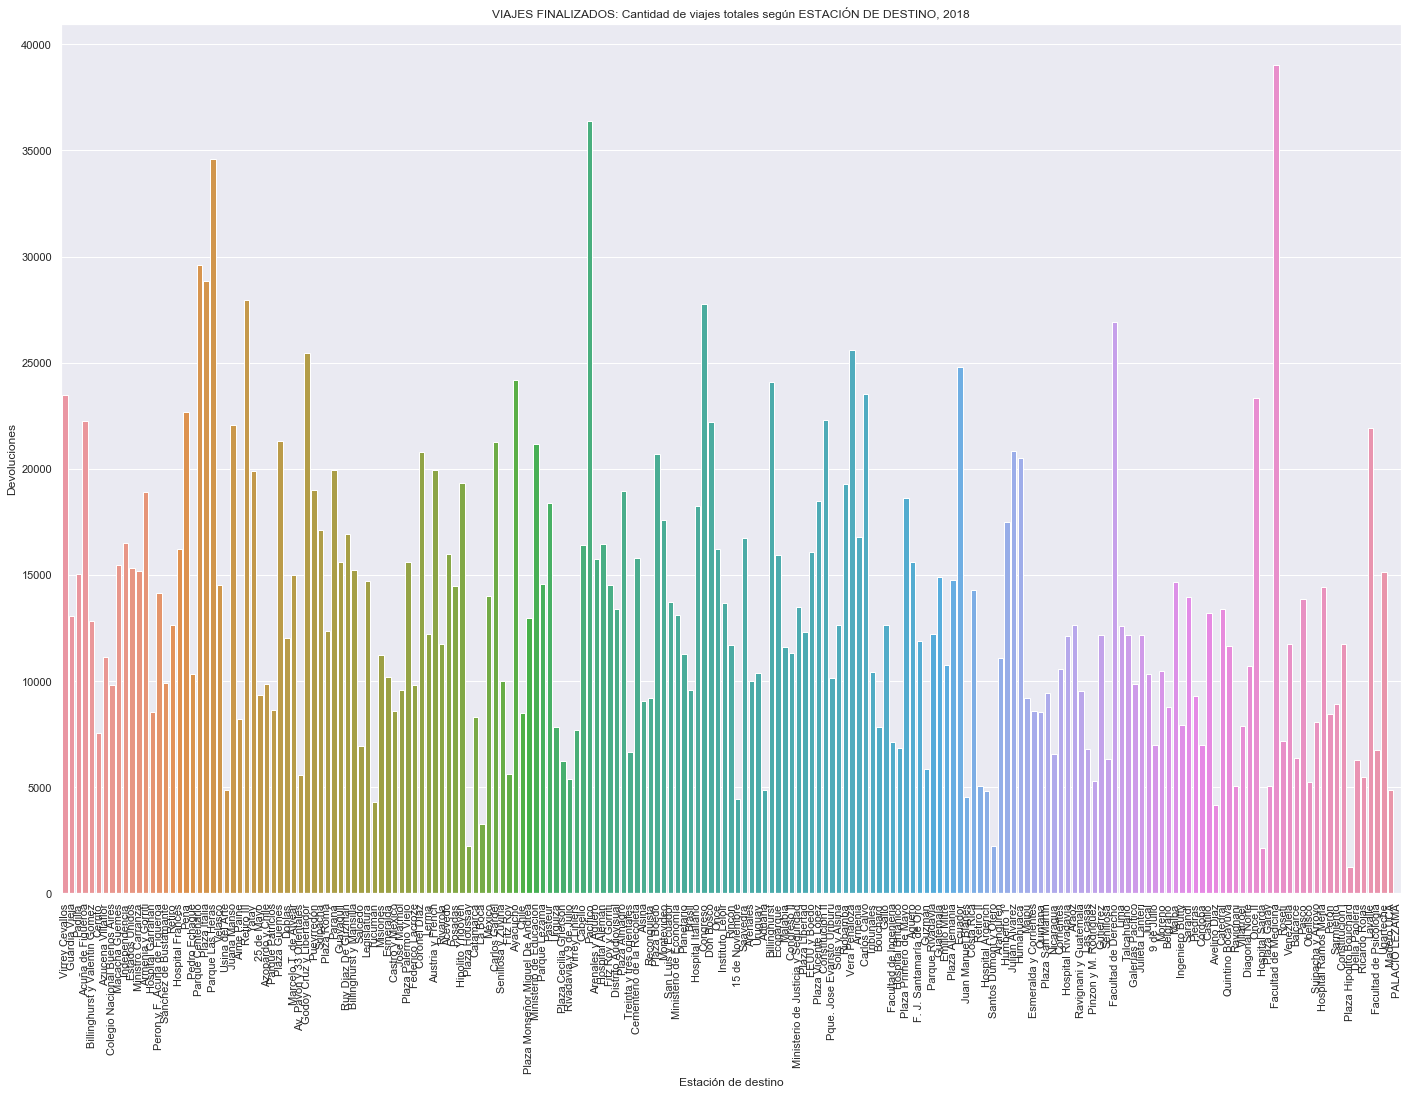

In [35]:
plt.xticks(rotation = 90)
sns.countplot("bici_nombre_estacion_destino", data=df).set_title("VIAJES FINALIZADOS: Cantidad de viajes totales según ESTACIÓN DE DESTINO, 2018")
plt.xlabel("Estación de destino")
plt.ylabel("Devoluciones")

## RTA: La estaciones más usadas tanto para retiros y devoluciones fueron Facultad de Medicina y la menos usada Palacio Lezama. Al tener tan pocos usuarios, utilizaré la inmediatamente anterior, Plaza Hipólito Bouchard (ambas de las últimas en inaugurarse) para la siguiente pregunta.

# c.2

# d. Esto requiere binning de la variable "bici_edad" (categorías inventadas por mí). 

In [36]:
bins = [16, 20, 29, 38, 55, 100] #incluye al segundo número y por encima de él entra en el otro grupo
nombres_grupo = ["Adolescentes (16-20)", "Jóvenes (21-29)", "Adultos Jóvenes (30-38)", "Adultos (39-55)", "Adultos Mayores (55+)"]
df["Grupo_Etario"] = pd.cut(df["bici_edad"], bins, labels= nombres_grupo)
df

,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,dia,hora,dia_semana,Grupo_Etario
0,5453,2018-01-01 00:08:05,0 days 00:19:53.000000000,Uruguay,45,Virrey Cevallos,183,M,45,1,0,Monday,Adultos (39-55)
1,673,2018-01-01 00:18:05,0 days 00:26:19.000000000,Posadas,189,Guardia Vieja,110,M,61,1,0,Monday,Adultos Mayores (55+)
2,179119,2018-01-01 00:20:14,0 days 00:27:39.000000000,Hospital Rivadavia,50,Padilla,31,F,52,1,0,Monday,Adultos (39-55)
3,400147,2018-01-01 00:20:22,0 days 00:48:51.000000000,Macacha Güemes,111,Acuña de Figueroa,54,M,27,1,0,Monday,Jóvenes (21-29)
4,400156,2018-01-01 00:20:31,0 days 00:49:27.000000000,Macacha Güemes,111,Acuña de Figueroa,54,F,27,1,0,Monday,Jóvenes (21-29)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2619963,190597,2018-12-30 19:46:32,0 days 00:07:15.000000000,Plaza Primero de Mayo,75,México,118,M,21,30,19,Sunday,Jóvenes (21-29)
2619964,119885,2018-12-30 19:48:14,0 days 00:09:59.000000000,Virrey Liniers,139,EEUU y Boedo,199,F,22,30,19,Sunday,Jóvenes (21-29)
2619965,652034,2018-12-30 19:48:51,0 days 00:10:32.000000000,Peña,30,Ayacucho,76,F,20,30,19,Sunday,Adolescentes (16-20)
2619966,467438,2018-12-30 19:51:42,0 days 00:09:57.000000000,Sánchez de Bustamante,52,Sánchez de Bustamante,52,M,26,30,19,Sunday,Jóvenes (21-29)


Text(0, 0.5, 'Viajes')

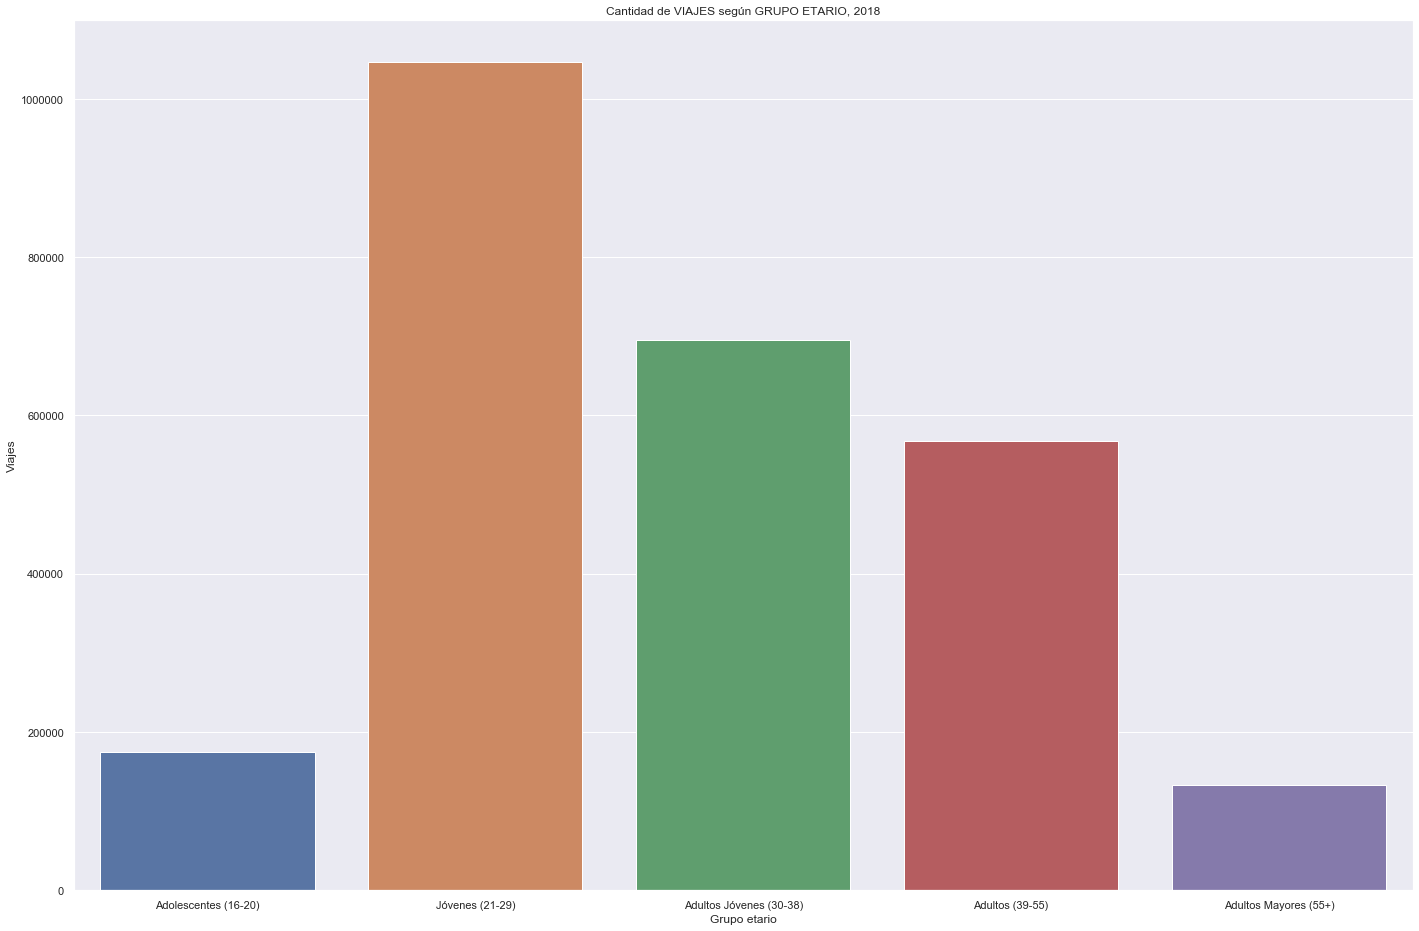

In [37]:
sns.set(style="darkgrid")
sns.countplot("Grupo_Etario", data=df).set_title("Cantidad de VIAJES según GRUPO ETARIO, 2018")
plt.xlabel("Grupo etario")
plt.ylabel("Viajes")

In [38]:
df.Grupo_Etario.value_counts()

Jóvenes (21-29)            1046796
Adultos Jóvenes (30-38)     695231
Adultos (39-55)             567237
Adolescentes (16-20)        174156
Adultos Mayores (55+)       132714
Name: Grupo_Etario, dtype: int64

In [39]:
df.Grupo_Etario.value_counts(normalize=True)

Jóvenes (21-29)            0.400131
Adultos Jóvenes (30-38)    0.265747
Adultos (39-55)            0.216823
Adolescentes (16-20)       0.066570
Adultos Mayores (55+)      0.050729
Name: Grupo_Etario, dtype: float64

## RTA: El segmento etario que más utilizó el sistema fue "jóvenes" -conformado por M y F entre 21 y 29 años- con 1.046.796 viajes, equivalentes al 40%.

### OTROS GRÁFICOS QUE ILUSTRAN SOBRE LA EDAD DE LOS USUARIOS

Text(0, 0.5, 'Retiros de bicicleta')

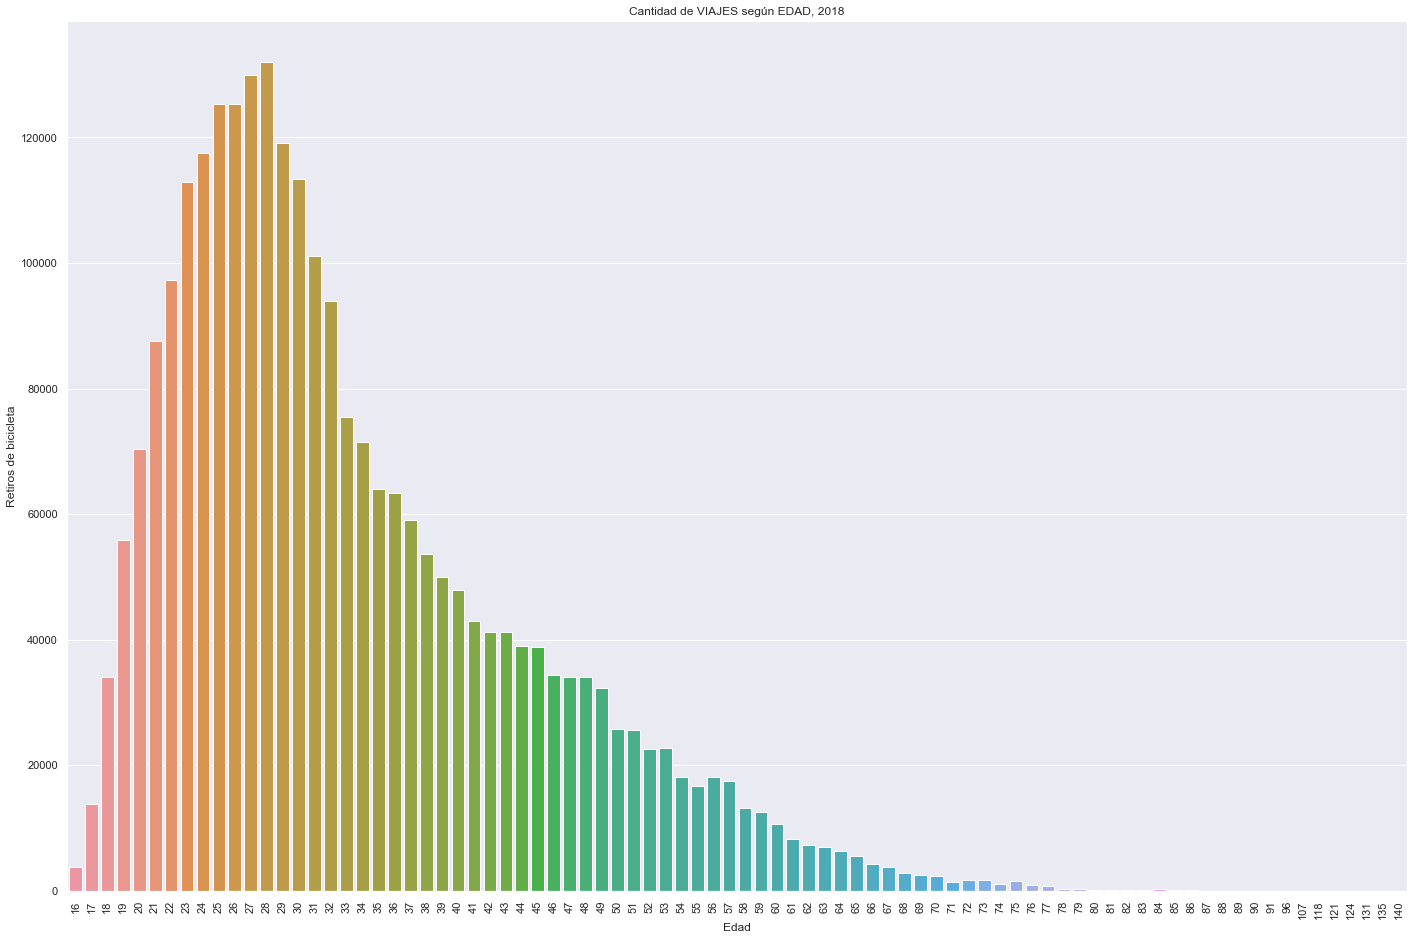

In [21]:
#4. 
plt.xticks(rotation = 90)
sns.set(style="darkgrid")
sns.countplot("bici_edad", data=df).set_title("Cantidad de VIAJES según EDAD, 2018") 
plt.xlabel("Edad")
plt.ylabel("Retiros de bicicleta")

## La distribución de la variable edad presenta una *asimetría estadística positiva*.

In [40]:
moda = df["bici_edad"].mode()
print(moda)

0    28
dtype: int64


In [41]:
mediana = df["bici_edad"].median()
print(mediana)

30.0


In [42]:
promedio = df["bici_edad"].mean()
print(promedio)

33.22898409446222


## La moda para la edad fue 28 años, la mediana 30, y el promedio 33.22 años. 

In [43]:
#filtrado de acuerdo a un criterio (EDAD) con dos valores
df[(df.bici_edad >= 80) & (df.bici_edad <140)]


,bici_id_usuario,bici_Fecha_hora_retiro,bici_tiempo_uso,bici_nombre_estacion_origen,bici_estacion_origen,bici_nombre_estacion_destino,bici_estacion_destino,bici_sexo,bici_edad,dia,hora,dia_semana,Grupo_Etario
128,6188,2018-01-01 04:49:29,0 days 00:19:32.000000000,Plaza Güemes,25,Plaza Güemes,25,F,83,1,4,Monday,Adultos Mayores (55+)
156,6188,2018-01-01 05:44:02,0 days 00:12:57.000000000,Plaza Monseñor Miguel De Andrea,165,San Luis y Ecuador,170,F,83,1,5,Monday,Adultos Mayores (55+)
244,154790,2018-01-01 08:44:02,0 days 01:46:20.000000000,Ministro Carranza,58,Pacífico,14,M,80,1,8,Monday,Adultos Mayores (55+)
951,72638,2018-01-01 16:06:41,0 days 00:47:47.000000000,Avelino Diaz,97,Avelino Diaz,97,M,81,1,16,Monday,Adultos Mayores (55+)
2563,170513,2018-01-02 08:20:31,0 days 00:07:31.000000000,Arenales,22,Plaza Vicente López,12,M,84,2,8,Tuesday,Adultos Mayores (55+)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2612807,328790,2018-12-28 11:23:08,0 days 00:31:27.000000000,México,118,Solis y Alsina,141,M,82,28,11,Friday,Adultos Mayores (55+)
2613530,328790,2018-12-28 14:40:04,0 days 00:18:24.000000000,Solis y Alsina,141,Solis y Alsina,141,M,82,28,14,Friday,Adultos Mayores (55+)
2616536,598696,2018-12-29 11:19:18,0 days 00:29:45.000000000,Instituto Leloir,74,Velasco,129,M,80,29,11,Saturday,Adultos Mayores (55+)
2617415,328790,2018-12-29 17:26:23,0 days 00:24:48.000000000,Quintana,115,Solis y Alsina,141,M,82,29,17,Saturday,Adultos Mayores (55+)


Text(0, 0.5, 'Frecuencia')

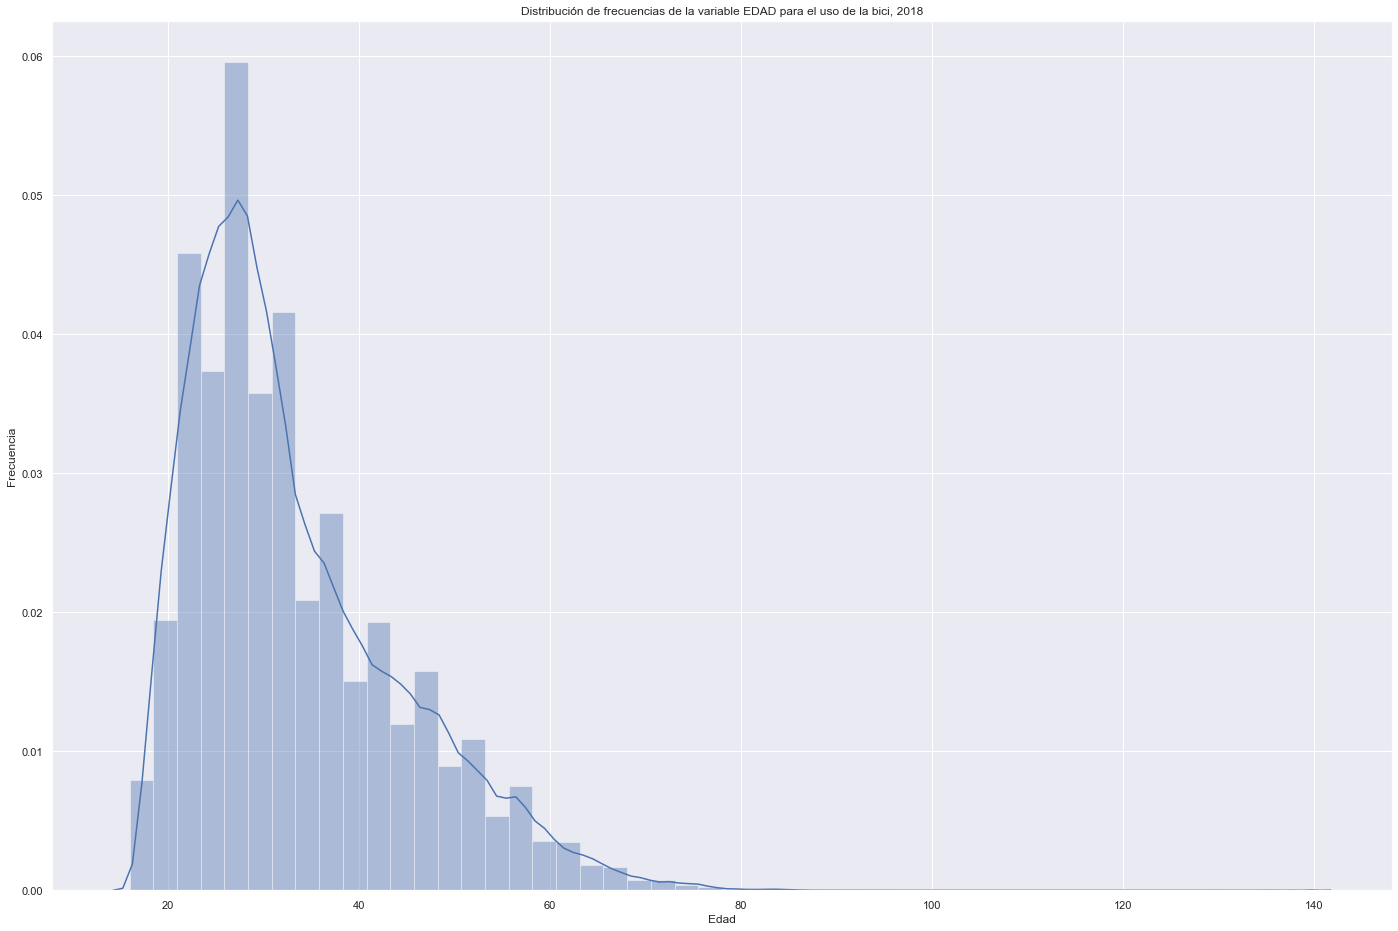

In [44]:
sns.set(style="darkgrid")
sns.distplot(df["bici_edad"]).set_title("Distribución de frecuencias de la variable EDAD para el uso de la bici, 2018")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

## c. 2 ¿Usaron más los hombres o las mujeres las estaciones de origen Facultad de Medicina y Plaza Hipólito Bouchard? 

In [45]:
df[df.bici_nombre_estacion_origen == "Facultad de Medicina"].bici_sexo.value_counts()#números enteros

M    27158
F    11700
Name: bici_sexo, dtype: int64

In [46]:
df[df.bici_nombre_estacion_origen == "Facultad de Medicina"].bici_sexo.value_counts(normalize= True)#porcentaje

M    0.698904
F    0.301096
Name: bici_sexo, dtype: float64

In [47]:
df[df.bici_nombre_estacion_origen == "Plaza Hipolito Bouchard"].bici_sexo.value_counts()#números enteros

M    1015
F     272
Name: bici_sexo, dtype: int64

In [48]:
df[df.bici_nombre_estacion_origen == "Plaza Hipolito Bouchard"].bici_sexo.value_counts(normalize= True)#porcentaje

M    0.788656
F    0.211344
Name: bici_sexo, dtype: float64

## ¿Usaron más los hombres o las mujeres las estaciones de destino Facultad de Medicina y Plaza Hipólito Bouchard? 

In [13]:
df[df.bici_nombre_estacion_destino == "Facultad de Medicina"].bici_sexo.value_counts()#números enteros

M    27286
F    11741
Name: bici_sexo, dtype: int64

In [10]:
df[df.bici_nombre_estacion_destino == "Facultad de Medicina"].bici_sexo.value_counts(normalize= True)#porcentaje

M    0.699157
F    0.300843
Name: bici_sexo, dtype: float64

In [14]:
df[df.bici_nombre_estacion_destino == "Plaza Hipolito Bouchard"].bici_sexo.value_counts()#números enteros

M    987
F    259
Name: bici_sexo, dtype: int64

In [12]:
df[df.bici_nombre_estacion_destino == "Plaza Hipolito Bouchard"].bici_sexo.value_counts(normalize= True)#porcentaje

M    0.792135
F    0.207865
Name: bici_sexo, dtype: float64

# e.

In [49]:
len(df.bici_nombre_estacion_origen)#cantidad de viajes desde origen

2619968

In [50]:
len(df.bici_nombre_estacion_destino)#cantidad de viajes desde destino

2619968

In [51]:
len(df.bici_nombre_estacion_origen) == len(df.bici_nombre_estacion_destino)# lo mismo pero mediante un booleano

True

In [52]:
#comparación entre los nombres de las estaciones de origen y destino
df.bici_nombre_estacion_origen.unique() == df.bici_nombre_estacion_destino.unique()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## NOTA: Da "falso" porque el orden de las estaciones es distinto en la gran mayoría de los casos -sólo 4 excepciones, pero no porque las estaciones sean distintas.

In [53]:
df.bici_nombre_estacion_origen.value_counts() #199 estaciones de ORIGEN

Facultad de Medicina       38858
Pacífico                   36834
Parque Las Heras           36500
Plaza Italia               32722
Retiro III                 30765
                           ...  
Santos Dumont y Otero       2419
Plaza Houssay               2213
Hospital Sarda              2090
Plaza Hipolito Bouchard     1287
PALACIO LEZAMA                 5
Name: bici_nombre_estacion_origen, Length: 199, dtype: int64

In [54]:
 df.bici_nombre_estacion_destino.value_counts() #199 estaciones de DESTINO

Facultad de Medicina       39027
Pacífico                   36402
Parque Las Heras           34573
Parque Centenario          29611
Plaza Italia               28842
                           ...  
Santos Dumont y Otero       2239
Plaza Houssay               2229
Hospital Sarda              2152
Plaza Hipolito Bouchard     1246
PALACIO LEZAMA                12
Name: bici_nombre_estacion_destino, Length: 199, dtype: int64

In [55]:
len(df.bici_nombre_estacion_origen.value_counts()) == len(df.bici_nombre_estacion_destino.value_counts())

True

In [56]:
df.bici_nombre_estacion_origen.unique()

array(['Uruguay', 'Posadas', 'Hospital Rivadavia', 'Macacha Güemes',
       'Yatay', 'Pque. Jose Evaristo Uriburu', 'Obelisco', 'Plaza Boedo',
       'Hipolito Yrigoyen', 'Ministro Carranza', 'Plaza Italia',
       'Hospital Garrahan', 'Virrey Cevallos',
       'Colegio Nacional Buenos Aires', 'Maipú', 'La Boca',
       'Senillosa y Zuviria', 'Aranguren', 'Humberto 1º',
       'Ministerio de Educacion', 'Avelino Diaz', 'Hospital Francés',
       'Federico Lacroze', 'Ayacucho', 'Virrey Liniers',
       'Hospital Alemán', 'Padilla', '25 de Mayo', 'Azopardo y Chile',
       'Juana Manso', 'Brasil', 'Acuña de Figueroa', 'Azucena Villaflor',
       'Armenia y Gorriti', 'Coronel Díaz', 'Plaza Güemes',
       'Plaza Primero de Mayo', 'Montevideo', 'Riobamba', 'Guatemala',
       'Independencia', 'Guayaquil', 'Parque Patricios',
       'Peron y F. Acuña de Figueroa', 'Plaza Roma', 'Juncal',
       'Talcahuano', 'Agüero', 'Las casas', 'Velasco', 'Cerrito',
       'Suipacha', 'Humahuaca', 'EEUU 

In [57]:
df.bici_nombre_estacion_destino.unique()

array(['Virrey Cevallos', 'Guardia Vieja', 'Padilla', 'Acuña de Figueroa',
       'Billinghurst y Valentin Gomez', 'Cerrito', 'Azucena Villaflor',
       'Colegio Nacional Buenos Aires', 'Macacha Güemes', 'Independencia',
       'Estados Unidos', 'Ministro Carranza', 'Armenia y Gorriti',
       'Hospital Garrahan', 'Peron y F. Acuña de Figueroa',
       'Sánchez de Bustamante', 'Retiro', 'Hospital Francés', 'Peña',
       'Pedro Echague', 'Parque Centenario', 'Plaza Italia',
       'Parque Las Heras', 'Velasco', 'Usina del Arte', 'Juana Manso',
       'Aime Paine', 'Retiro III', 'Yatay', '25 de Mayo',
       'Azopardo y Chile', 'Parque Patricios', 'Plaza Güemes', 'Doblas',
       'Marcelo T. de Alvear', 'Av. Pavon y 33 Orientales',
       'Godoy Cruz y Libertador', 'Pueyrredón', 'Suipacha', 'Plaza Roma',
       'Paraná', 'Guayaquil', 'Ruy Diaz De Guzman',
       'Billinghurst y Mansilla', 'Salcedo', 'Legislatura', 'Tucumán',
       'Misiones', 'Esmeralda', 'Castro y Mexico', 'Jose Marm

## RTA: Dado que coinciden el número de viajes marcados por su origen con el número marcado mediante su destino -2.619.968- y que el número de estaciones únicas coincide en ambas columnas -199- sin haber ninguna etiqueta para NaNs ni ninguna etiqueta "rara", podemos concluir que NO HAY VIAJES SIN FINALIZAR EN EL DATASET.

# 3) Conclusión
En cuanto a los datos, sólo queda repetir lo dicho más arriba: el segmento etario que más utilizó el sistema fue "jóvenes" -conformado por M y F entre 21 y 29 años- con 1.046.796 viajes, equivalentes al 40%. El gráfico de la variable edad muestra una asimetría estadística positiva, en que La moda para la edad fue 28 años, la mediana 30, y el promedio 33.22 años. 


# 4) DESAFÍO: ¿Qué otras preguntas se les ocurren para hacerse con este Dataset?

Podríamos 

...bajar más datasets y hacer comparaciones interanuales de las variables que estudiamos y/o otras. Hay que tener en cuenta que la red  de estaciones de bici era más pequeña en años anteriores.

...comparar los porcentajes de uso por parte de M o F entre BA y otras ciudades, como por ejemplo Amsterdam, ciudad paradigma del uso de la bicicleta y de la igualdad.

…reflexionar sobre las implicancias para las administraciones públicas: si con esta pequeña muestra ya encontramos un error en Wikipedia, ¿hasta qué punto las administraciones se van a plegar a abrir los datos que muestran los resultados e impactos de sus políticas públicas?
